In [1]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import mlflow  # Import MLflow
#import mlflow.sklearn  # Import MLflow's scikit-learn package
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

In [18]:
remote_server_uri = "http://127.0.0.1:5000" # set to your server URI


In [47]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [48]:
print("Current tracking URI: ", mlflow.get_tracking_uri())

Current tracking URI:  http://127.0.0.1:5000


In [49]:
mlflow.set_experiment("KNN2")

2023/10/12 05:33:16 INFO mlflow.tracking.fluent: Experiment with name 'KNN2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/445246962365691981', creation_time=1697106796073, experiment_id='445246962365691981', last_update_time=1697106796073, lifecycle_stage='active', name='KNN2', tags={}>

In [50]:
# Initialize MLflow experiment
mlflow.start_run(experiment_id=None, run_name="KNN_Audio_Features_2", nested=True)

mlflow.autolog()

2023/10/12 05:33:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/10/12 05:33:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [51]:
df = pd.read_csv('claybowls_starred.csv')

In [61]:
# Sample data: Replace this with your actual audio features data
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X_train = np.random.rand(100, 5)  # 100 songs, 5 audio features each
y_train = np.random.randint(0, 2, 100)  # Labels (not necessary for unsupervised K-NN)
X_test = np.random.rand(10, 5)  # 10 songs to find neighbors for


In [62]:
# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [63]:
# Log model parameters
mlflow.log_param("n_neighbors", 10)
mlflow.log_param("metric", 'euclidean')

'euclidean'

In [66]:
# Fit the model
knn.fit(X_train, y_train)

# Save the model using MLflow
mlflow.sklearn.save_model(sk_model=knn, path="K-NN_Music_Features_5")

# Log the model
mlflow.sklearn.log_model(knn, "KNN_Model")

# Find the nearest neighbors
distances, indices = knn.kneighbors(X_test)

# Log metrics (example: mean distance of the first query point)
mlflow.log_metric("mean_distance_first_query", np.mean(distances[0]))



In [9]:
mlflow.sklearn.log_model(
    sk_model=knn,
    artifact_path="sklearn-model",
    registered_model_name="K-NN",
)

Successfully registered model 'K-NN'.
2023/10/12 03:29:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: K-NN, version 1
Created version '1' of model 'K-NN'.


In [53]:
# Get the URI of the currently active run's artifact location
artifact_uri = mlflow.get_artifact_uri()

print("Artifact URI:", artifact_uri)

Artifact URI: mlflow-artifacts:/445246962365691981/76a4784edaf54367bf85e3bd8d37220e/artifacts


In [ ]:
# mlflow.set_tracking_uri("reinforcement_learning\pipeline\data_augmentation\K-NN_Music_Features_2")

In [ ]:
# Display the indices of 10 nearest songs for each song in X_test
print('Indices of 10 nearest songs:', indices)

In [ ]:
# # Importing the CSV file containing Clayton's starred songs and their audio features
# df = pd.read_csv('claybowls_starred.csv')

In [59]:
# Selecting only the audio features from the DataFrame
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X_train_clayton = df[audio_features].values

# Initialize K-NN classifier with Clayton's data
knn_clayton = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Fit the model with Clayton's data
knn_clayton.fit(X_train_clayton, np.zeros(X_train_clayton.shape[0]))  # Labels set to zero as they are not necessary for unsupervised K-NN

# Clayton's average audio feature values
clayton_avg_features = np.array([0.6541, 0.5704, -9.4199, 0.1001, 0.2857, 0.2042, 0.2016, 0.5649, 119.9958])

# Reshape the array to make it compatible with scikit-learn methods
clayton_avg_features = clayton_avg_features.reshape(1, -1)

# Use K-NN to find the 10 nearest songs to Clayton's average audio features
distances, indices = knn_clayton.kneighbors(clayton_avg_features)

# Display the indices of the 10 nearest songs to Clayton's average
print('Indices of 10 nearest songs to Clayton\'s average:', indices)

2023/10/12 05:38:12 WARNING mlflow.sklearn.utils: log_loss failed. The metric training_log_loss will not be recorded. Metric error: y_true contains only one label (0.0). Please provide the true labels explicitly through the labels argument.
2023/10/12 05:38:12 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: Only one class present in y_true. ROC AUC score is not defined in that case.


Indices of 10 nearest songs to Clayton's average: [[ 482  795  879  448  836  461  618 1380  252   14]]


In [60]:
mlflow.sklearn.log_model(
    sk_model=knn_clayton,
    artifact_path="sklearn-model",
    registered_model_name="K-NN",
)

Registered model 'K-NN' already exists. Creating a new version of this model...
2023/10/12 05:38:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: K-NN, version 2
Created version '2' of model 'K-NN'.


In [58]:
# # Save the model using MLflow
# mlflow.sklearn.save_model(sk_model=knn, path="K-NN_Music_Features_4")

# Log the model
mlflow.sklearn.log_model(knn, "KNN_Model")

In [56]:
# Clayton's average audio feature values
clayton_avg_features = np.array([0.6541, 0.5704, -9.4199, 0.1001, 0.2857, 0.2042, 0.2016, 0.5649, 119.9958])
clayton_avg_features = clayton_avg_features.reshape(1, -1)

# Use K-NN to find the 10 nearest songs to Clayton's average audio features
distances, indices = knn_clayton.kneighbors(clayton_avg_features)


In [45]:
# Retrieve the song names corresponding to the indices of the 10 nearest songs to Clayton's average
nearest_songs = df.iloc[indices[0]]

# Display the names, artists, and albums of the 10 nearest songs
nearest_songs[['name', 'artist', 'album']]

# Set the style for the plots
sns.set(style='whitegrid')

# Create a DataFrame containing only the 10 nearest songs and their audio features
nearest_songs_features = nearest_songs[audio_features]

# Add Clayton's average audio features as a new row to the DataFrame
nearest_songs_features.loc['Clayton_Avg'] = clayton_avg_features[0]

C:\Users\clayb\AppData\Local\Temp\ipykernel_57524\3892031015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_songs_features.loc['Clayton_Avg'] = clayton_avg_features[0]


In [46]:
# End MLflow run
mlflow.end_run()

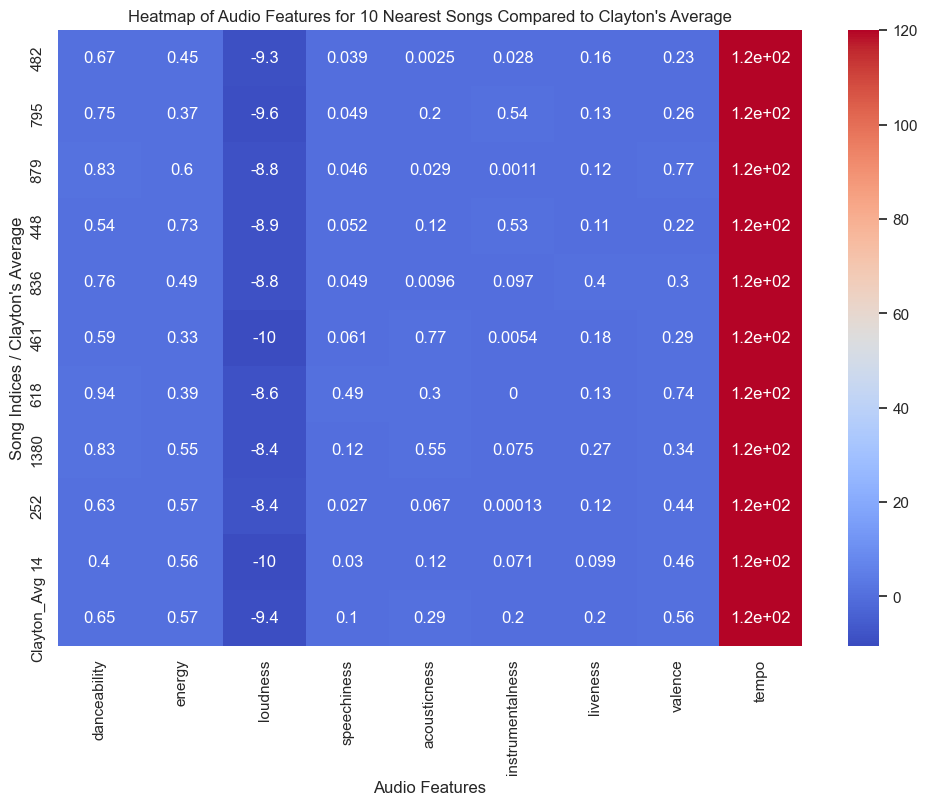

In [32]:
# Create a heatmap to visualize the audio features of the 10 nearest songs compared to Clayton's average
plt.figure(figsize=(12, 8))
sns.heatmap(nearest_songs_features, annot=True, cmap='coolwarm', cbar=True, xticklabels=audio_features, yticklabels=nearest_songs_features.index)
plt.title('Heatmap of Audio Features for 10 Nearest Songs Compared to Clayton\'s Average')
plt.xlabel('Audio Features')
plt.ylabel('Song Indices / Clayton\'s Average')
plt.show()